In [1]:
%matplotlib inline

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.
/home/teddy/keras/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/teddy/keras/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/teddy/keras/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/teddy/keras/venv/lib/python3.6/site-packages/tenso

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
history = model.fit(x_train[10000:], y_train[10000:], epochs=10, batch_size=128,validation_data=(x_train[:10000],y_train[:10000]))


Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 1s 99us/step - loss: 0.3952 - accuracy: 0.8433 - val_loss: 0.2859 - val_accuracy: 0.8880
Epoch 2/10
15000/15000 [==============================] - 1s 79us/step - loss: 0.2093 - accuracy: 0.9213 - val_loss: 0.3170 - val_accuracy: 0.8730
Epoch 3/10
15000/15000 [==============================] - 1s 80us/step - loss: 0.1528 - accuracy: 0.9451 - val_loss: 0.3106 - val_accuracy: 0.8822
Epoch 4/10
15000/15000 [==============================] - 1s 76us/step - loss: 0.1193 - accuracy: 0.9573 - val_loss: 0.3328 - val_accuracy: 0.8801
Epoch 5/10
15000/15000 [==============================] - 1s 79us/step - loss: 0.0913 - accuracy: 0.9685 - val_loss: 0.4169 - val_accuracy: 0.8748
Epoch 6/10
15000/15000 [==============================] - 1s 78us/step - loss: 0.0707 - accuracy: 0.9753 - val_loss: 0.4879 - val_accuracy: 0.8692
Epoch 7/10
15000/15000 [==============================] - 1s 78us/s

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

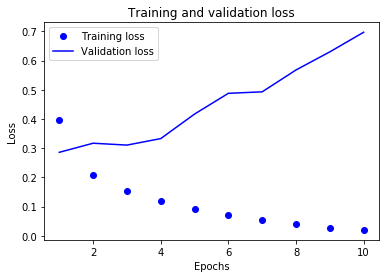

In [9]:
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs,val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

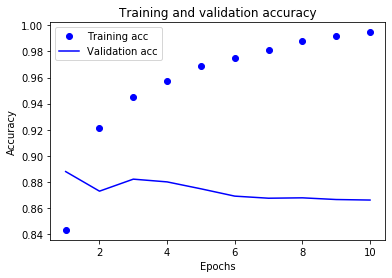

In [10]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()